<a href="https://colab.research.google.com/github/ToluPaul/Fifa-22_analysis/blob/main/Fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#show the first five columns of the dataset
p21 = pd.read_csv("/content/players_21.csv")
display(p21.head())

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
#display the number of rows and columns and the columns in the dataset
print('The number of rows and columns is {}'.format(p21.shape))
print('')
display(p21.columns)

The number of rows and columns is (13254, 110)



Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [5]:
#identify useful columns in the dataset and what the url columns entails
p21[['player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url']].head()

,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
#drop the url columns because it wont be needed for analysis
p21_clean = p21.drop(['player_face_url', 'player_url','club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url', 'long_name'], axis = 1)
display(len(p21_clean.columns))

103

In [7]:
#check the properties of the column
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : int64
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : object
height_cm : int64
weight_kg : int64
club_team_id : float64
club_name : object
league_name : object
league_level : float64
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : int64
nationality_name : object
nation_team_id : float64
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : int64
attacking_finishing : int64
attacking_heading_accuracy : int64
attacking_short_passing : i

<ipython-input-7-1bfce4596f89>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [8]:
#check the league_level and dob columns
p21_clean[['dob', 'league_level']]

,dob,league_level
0,1987-06-24,1.0
1,1985-02-05,1.0
2,1988-08-21,1.0
3,1992-02-05,1.0
4,1991-06-28,1.0
...,...,...
13249,1988-02-29,1.0
13250,1996-02-29,1.0
13251,2000-02-29,1.0
13252,2000-02-29,1.0


In [9]:
#change dob to datetime object and any column that ends with id to a category datatype
p21_clean['dob'] = pd.to_datetime(p21_clean['dob'])
p21_clean['league_level'] = p21_clean['league_level'].astype('category')
p21_clean['nationality_name'] = p21_clean['nationality_name'].astype('category')
for i in p21_clean.dtypes.keys():
    if '_id' in i:
      p21_clean[i] = p21_clean[i].astype('category')
    else:
      p21_clean[i] = p21_clean[i]
for k, i  in p21_clean.dtypes.iteritems():
  print(k,':', i)

sofifa_id : category
short_name : object
player_positions : object
overall : int64
potential : int64
value_eur : float64
wage_eur : float64
age : int64
dob : datetime64[ns]
height_cm : int64
weight_kg : int64
club_team_id : category
club_name : object
league_name : object
league_level : category
club_position : object
club_jersey_number : float64
club_loaned_from : object
club_joined : object
club_contract_valid_until : float64
nationality_id : category
nationality_name : category
nation_team_id : category
nation_position : object
nation_jersey_number : float64
preferred_foot : object
weak_foot : int64
skill_moves : int64
international_reputation : int64
work_rate : object
body_type : object
real_face : object
release_clause_eur : float64
player_tags : object
player_traits : object
pace : float64
shooting : float64
passing : float64
dribbling : float64
defending : float64
physic : float64
attacking_crossing : int64
attacking_finishing : int64
attacking_heading_accuracy : int64
attackin

<ipython-input-9-27c7bee4b9cc>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i  in p21_clean.dtypes.iteritems():


In [10]:
#check quick stats of the data
p21_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,nation_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,13254.000000,13254.000000,1.304600e+04,13055.000000,13254.000000,13254.000000,13254.000000,13055.000000,13055.000000,1091.000000,...,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,1305.000000
mean,69.131357,72.521956,3.984962e+06,12485.679816,26.660933,181.330994,75.619360,18.484336,2022.012486,12.007333,...,62.320960,49.997586,50.548136,48.149163,16.360948,16.151351,15.986570,16.230496,16.465595,40.688889
std,4.997383,5.746363,9.060543e+06,23019.169758,4.268671,6.839754,7.062839,16.333365,1.242935,6.685459,...,10.460883,20.152171,21.672860,21.430883,17.945690,17.147331,16.762939,17.536361,18.302050,9.783378
min,62.000000,62.000000,4.500000e+04,500.000000,16.000000,155.000000,50.000000,1.000000,2020.000000,1.000000,...,12.000000,3.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,65.000000,68.000000,8.500000e+05,2000.000000,23.000000,176.000000,70.000000,8.000000,2021.000000,6.000000,...,57.000000,32.000000,30.000000,27.000000,8.000000,8.000000,8.000000,8.000000,8.000000,34.000000
50%,68.000000,72.000000,1.500000e+06,5000.000000,26.000000,181.000000,75.000000,15.000000,2022.000000,12.000000,...,63.000000,58.000000,60.000000,57.000000,11.000000,11.000000,11.000000,11.000000,11.000000,42.000000
75%,72.000000,76.000000,2.900000e+06,13000.000000,30.000000,186.000000,80.000000,24.000000,2023.000000,18.000000,...,69.000000,66.000000,68.000000,66.000000,14.000000,14.000000,14.000000,14.000000,14.000000,47.000000
max,93.000000,95.000000,1.855000e+08,560000.000000,43.000000,206.000000,110.000000,99.000000,2028.000000,27.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [11]:
#check for columns with null values
display(p21_clean.isnull().values.any())
#p21_clean_null_columns = p21_clean[p21_clean.isnull() > 0].sum()
p21_clean.isna().sum() > 0
for i, k in p21_clean.isna().sum().iteritems() :
    if  k > 0:
      print(i, ':' ,k)

True

value_eur : 208
wage_eur : 199
club_team_id : 199
club_name : 199
league_name : 199
league_level : 199
club_position : 199
club_jersey_number : 199
club_loaned_from : 12700
club_joined : 753
club_contract_valid_until : 199
nation_team_id : 12163
nation_position : 12163
nation_jersey_number : 12163
release_clause_eur : 762
player_tags : 11889
player_traits : 5679
pace : 1305
shooting : 1305
passing : 1305
dribbling : 1305
defending : 1305
physic : 1305
goalkeeping_speed : 11949


<ipython-input-11-e92e18c5790d>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, k in p21_clean.isna().sum().iteritems() :


In [12]:
p21[p21['goalkeeping_speed'].isna()]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13249,230179,https://sofifa.com/player/230179/marlon-romulo...,Marlon Barninho,Marlon Rômulo Barni Barros,"GK, RB",62,62,200000.0,2000.0,32,...,25+2,25+2,25+2,25+2,61+1,https://cdn.sofifa.net/players/230/179/21_120.png,https://cdn.sofifa.net/teams/569/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
13250,230270,https://sofifa.com/player/230270/fabiem-kel-ja...,Fabiem Jardim,Fabiem Kel Jardim Ramos,CAM,62,62,450000.0,2000.0,24,...,50+2,50+2,50+2,51+2,15+2,https://cdn.sofifa.net/players/230/270/21_120.png,https://cdn.sofifa.net/teams/111052/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
13251,230290,https://sofifa.com/player/230290/deniro-rubens...,Dêniro Prestes,Dêniro Rubens Prestes Cadete,ST,62,62,450000.0,2000.0,20,...,42+2,42+2,42+2,38+2,20+2,https://cdn.sofifa.net/players/230/290/21_120.png,https://cdn.sofifa.net/teams/111059/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png
13252,230345,https://sofifa.com/player/230345/raullino-dani...,Raullino Meneses,Raullino Daniel Meneses Vila,"CDM, CB",62,62,400000.0,2000.0,20,...,62,62,62,61+1,13+2,https://cdn.sofifa.net/players/230/345/21_120.png,https://cdn.sofifa.net/teams/569/60.png,https://cdn.sofifa.net/flags/br.png,NaN,https://cdn.sofifa.net/flags/br.png


In [13]:
#drop columns with missing values above 10,000 and 'club_joined'
p21_deep_clean = p21_clean.drop(['club_loaned_from','nation_team_id','nation_position','club_joined',
                                 'nation_jersey_number', 'player_tags','player_traits',
                                 ], axis = 1)
#drop rows with missing values on league_level and physic and fill the null values of wage value
#... value and goalkeeping_speed with 0(not all playeres are goalkeepers)
p21_deep_clean = p21_deep_clean.dropna(subset = ['league_level', 'physic']).fillna(
    {'release_clause_eur':0, 'value_eur':0, 'goalkeeping_speed' : 0})
print('Is there any missing value?')
print('')
print('Answer : {}'.format(p21_deep_clean.isnull().values.any()))

Is there any missing value?

Answer : False


In [14]:
#check quick summary statistics
p21_deep_clean.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_jersey_number,club_contract_valid_until,weak_foot,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,11778.000000,11778.000000,1.177800e+04,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,...,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.0
mean,69.106300,72.576923,4.060851e+06,12768.381729,26.435728,180.515028,74.817371,18.532688,2022.020207,3.059857,...,64.060876,53.697402,54.471982,51.820937,10.543471,10.609441,10.580829,10.559178,10.534301,0.0
std,4.946748,5.760694,9.067760e+06,23369.643410,4.157303,6.536992,6.710666,15.919615,1.245428,0.659662,...,8.469172,17.442304,18.976345,19.172056,3.320709,3.261252,3.379729,3.319085,3.272289,0.0
min,62.000000,62.000000,0.000000e+00,500.000000,16.000000,155.000000,50.000000,1.000000,2020.000000,1.000000,...,41.000000,7.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,65.000000,68.000000,9.000000e+05,2000.000000,23.000000,176.000000,70.000000,8.000000,2021.000000,3.000000,...,58.000000,39.000000,38.000000,34.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.0
50%,68.000000,72.000000,1.500000e+06,5000.000000,26.000000,180.000000,75.000000,15.000000,2022.000000,3.000000,...,64.000000,60.000000,62.000000,60.000000,10.500000,11.000000,11.000000,10.000000,10.000000,0.0
75%,72.000000,76.000000,3.000000e+06,14000.000000,29.000000,185.000000,79.000000,24.000000,2023.000000,3.000000,...,70.000000,67.000000,69.000000,67.000000,13.000000,13.000000,13.000000,13.000000,13.000000,0.0
max,93.000000,95.000000,1.855000e+08,560000.000000,43.000000,203.000000,110.000000,99.000000,2028.000000,5.000000,...,96.000000,94.000000,93.000000,90.000000,67.000000,75.000000,75.000000,66.000000,63.000000,0.0


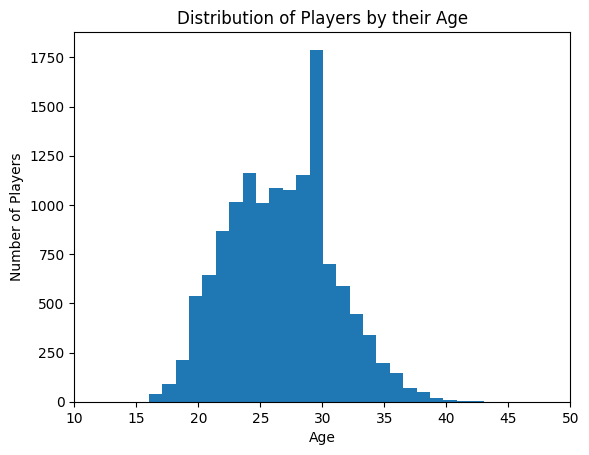

In [15]:
#check the distribution of ages
age = p21['age']
age_distribution = age.value_counts().sort_index()
plt.hist(age, bins = 25)
len = range(10,55,5)
plt.xticks(ticks =len)
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by their Age')
plt.show()


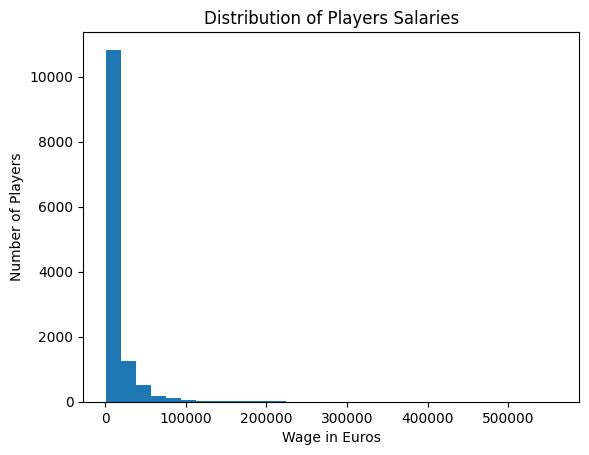

In [16]:
#check the distribution of players salary
plt.hist(p21.wage_eur.dropna(), bins = 30)
plt.xlabel('Wage in Euros')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Salaries')
plt.show()

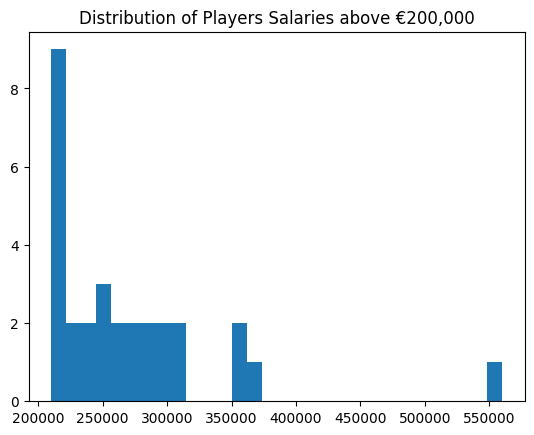

In [17]:
#check the distribution of players salary above 200,000
above_200000 = p21.loc[p21['wage_eur'] > 200000]
plt.hist(above_200000.wage_eur.dropna(), bins = 30)
plt.title('Distribution of Players Salaries above €200,000')
plt.show()

In [18]:
#write a function that plots the distribution of salaries in a specified range
def salary_distribution(x, sign):
  ''' This function plots a graph on the distribution players wages within a given range'''
  if sign == '>' :
    above  = p21.loc[p21['wage_eur'] > x]
    plt.hist(above.wage_eur.dropna(), bins = 10)
  elif sign == '<' :
    below  = p21.loc[p21['wage_eur'] < x]
    plt.hist(below.wage_eur.dropna(), bins = 10)
  plt.xlabel('Wage in Euros')
  plt.ylabel('Number of Players')
  plt.title('Distribution of Players Salaries')
  plt.show()

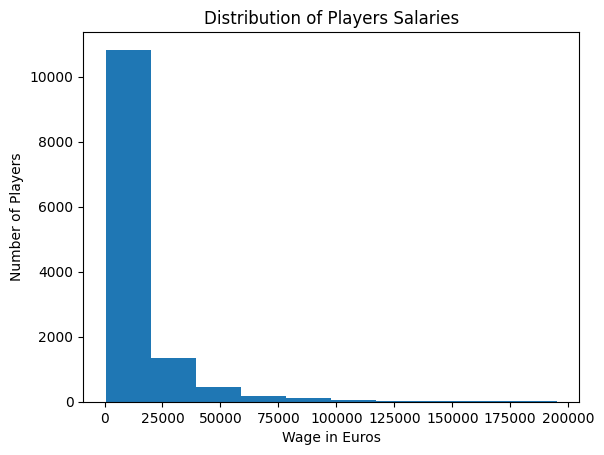

In [19]:
salary_distribution(200000, sign = '<')

In [20]:
#find the correlation between wage and potential
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['potential']))

0.5163536503706114


In [21]:
print(p21_deep_clean['wage_eur'].corr(p21_deep_clean['overall']))

0.695645598798439


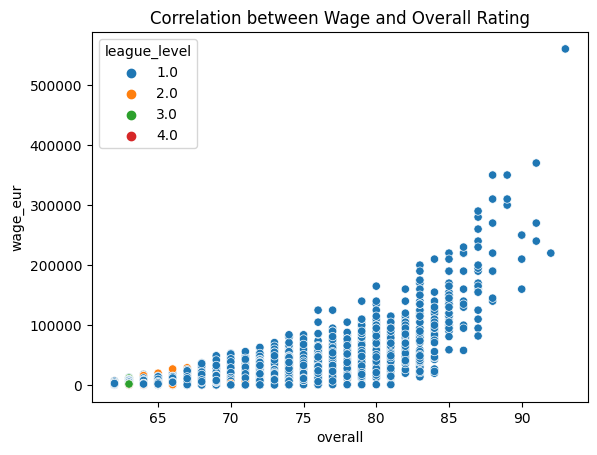

In [22]:
#scatterplot of overall rating vs wages grouped by league level
sns.scatterplot(x='overall', y = 'wage_eur', data= p21_deep_clean, hue='league_level' )
plt.title('Correlation between Wage and Overall Rating')
plt.show()

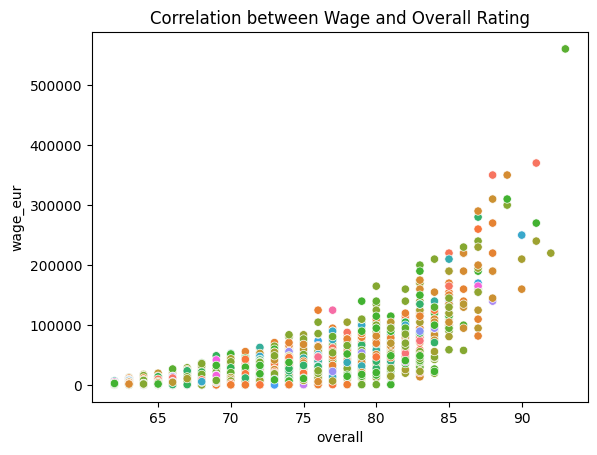

In [23]:
#scatterplot of overall rating vs wages grouped by league nationality_id
sns.scatterplot(x='overall', y = 'wage_eur', data= p21_deep_clean, hue='nationality_id')
plt.legend([],[],frameon=False)
plt.title('Correlation between Wage and Overall Rating')
plt.show()

In [24]:
print('The minimum wage is €{}'.format(p21['wage_eur'].min( )))
print('The maximum wage is €{}'.format(p21['wage_eur'].max( )))
print('The average wage is €{}'.format(p21['wage_eur'].mean()))

The minimum wage is €500.0
The maximum wage is €560000.0
The average wage is €12485.67981616239


In [25]:
top_earners = p21.sort_values('wage_eur', ascending=False)

In [26]:
print(top_earners[['short_name', 'wage_eur']].reset_index(drop=True).head(10))

     short_name  wage_eur
0      L. Messi  560000.0
1  K. De Bruyne  370000.0
2     E. Hazard  350000.0
3    K. Benzema  350000.0
4      T. Kroos  310000.0
5      Casemiro  310000.0
6     S. Agüero  300000.0
7  Sergio Ramos  300000.0
8  A. Griezmann  290000.0
9     L. Suárez  280000.0


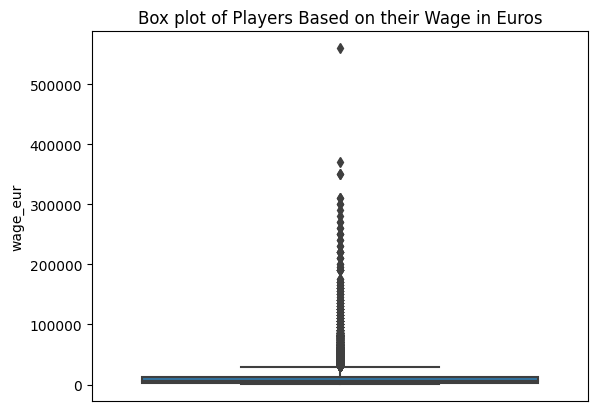

In [27]:
#check for the high earners
sns.boxplot(data = p21, y='wage_eur')
plt.title('Box plot of Players Based on their Wage in Euros')
plt.tick_params(axis = 'x', labelbottom = False, bottom = False)
plt.show()

In [28]:
#remove the outliers
wage_array = np.array(p21_deep_clean[['wage_eur']])

In [29]:
print(wage_array)

[[560000.]
 [220000.]
 [240000.]
 ...
 [  2000.]
 [  2000.]
 [  3000.]]


In [30]:
#calculate upper and lower percentile
sort_wage = p21_deep_clean['wage_eur'].sort_values()
mid_sort_wage = sort_wage.median()
q75, q25 = np.percentile(p21_deep_clean['wage_eur'], [75, 25])
iqr = q75 - q25

In [31]:
print(q75, iqr)

14000.0 12000.0


In [32]:
upper_whisker = q75 + (1.5*iqr)
print(upper_whisker)

32000.0


In [33]:
no_outlier = np.where(p21_deep_clean['wage_eur'] <= upper_whisker)
outlier = np.where(p21_deep_clean['wage_eur'] > upper_whisker)
print(p21[['short_name', 'wage_eur']].loc[outlier].head())
print('')
print(p21[['short_name', 'wage_eur']].loc[no_outlier].head())

          short_name  wage_eur
0           L. Messi  560000.0
1  Cristiano Ronaldo  220000.0
2     R. Lewandowski  240000.0
3          Neymar Jr  270000.0
4       K. De Bruyne  370000.0

              short_name  wage_eur
91   S. Milinković-Savić   95000.0
95                 Rodri  145000.0
106          Azpilicueta  120000.0
107             R. Bürki   68000.0
111             I. Gueye  105000.0


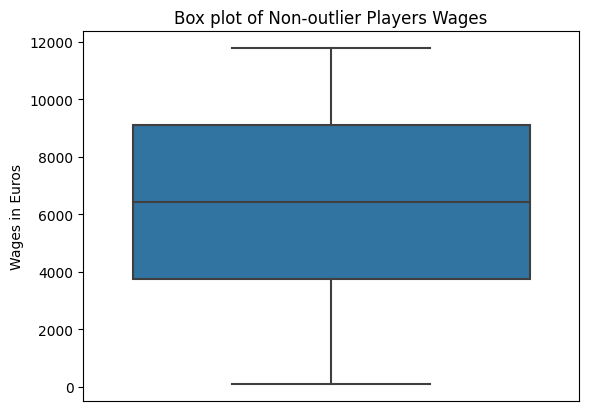

In [34]:
sns.boxplot(data = no_outlier)
plt.title('Box plot of Non-outlier Players Wages')
plt.ylabel('Wages in Euros')
plt.tick_params(axis = 'x', labelbottom = False, bottom = False)
plt.show()

In [35]:
len_outliers = p21[p21['wage_eur'] > upper_whisker].index.size
len_no_outliers = p21['wage_eur'].loc[no_outlier].index.size

print('The number of players who are outliers based on earning is {}'.format(len_outliers))
print('The number of players who are not outliers based on earning is {}'.format(len_no_outliers))
print('The percentage of the top paid players is {}'.format(round(len_outliers/(p21.index.size) * 100)))
print('')
print('The Wages of the top paid players is €{} and above'.format(upper_whisker))

The number of players who are outliers based on earning is 1191
The number of players who are not outliers based on earning is 10668
The percentage of the top paid players is 9

The Wages of the top paid players is €32000.0 and above


In [36]:
#Check the correlation between wage and overall without outliers
print(p21['wage_eur'].loc[no_outlier].corr(p21['overall'].loc[no_outlier]))
p21_no_outlier = p21.loc[no_outlier]

0.6849014977421848


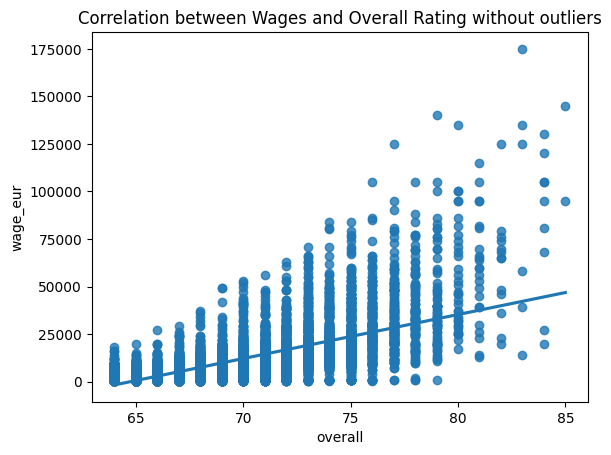


There is a moderate correlation between Wages and Overall Rating without outliers


In [37]:
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
plt.title('Correlation between Wages and Overall Rating without outliers')
plt.show()
print('')
print('There is a moderate correlation between Wages and Overall Rating without outliers')

In [38]:
#is any player paid less than 0 euros?
np.sum([p21_deep_clean['wage_eur'] < 0])

0

In [39]:
#Instantiate a model that uses this correlation to predict the wages of a player based on their rating
wage_eur_vs_overall = ols("wage_eur ~ overall", data = p21_no_outlier)
wage_eur_vs_overall = wage_eur_vs_overall.fit()
print(wage_eur_vs_overall.params)

Intercept   -149895.327913
overall        2314.500690
dtype: float64


In [40]:
#Make a prediction of a range of values
explanatory_data = pd.DataFrame({'overall':np.arange(60,81)})
prediction_data = explanatory_data.assign(
    wage_eur = wage_eur_vs_overall.predict(explanatory_data))
print(prediction_data)

    overall      wage_eur
0        60 -11025.286509
1        61  -8710.785819
2        62  -6396.285129
3        63  -4081.784439
4        64  -1767.283749
5        65    547.216942
6        66   2861.717632
7        67   5176.218322
8        68   7490.719012
9        69   9805.219702
10       70  12119.720392
11       71  14434.221082
12       72  16748.721772
13       73  19063.222462
14       74  21377.723152
15       75  23692.223842
16       76  26006.724532
17       77  28321.225222
18       78  30635.725913
19       79  32950.226603
20       80  35264.727293


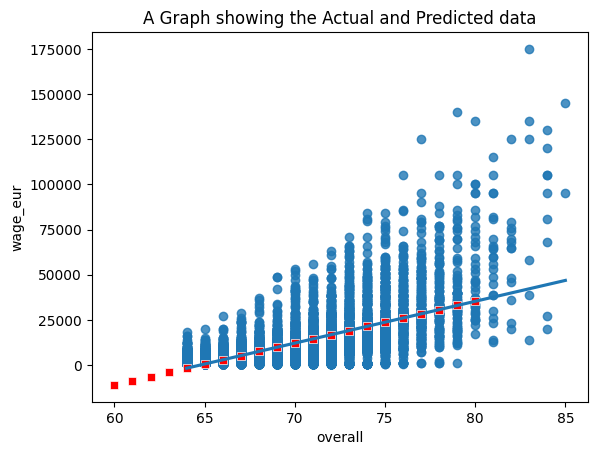

In [41]:
#Plot a graph of the original dataset and the predicted values
fig = plt.figure()
sns.regplot(x='overall', y = 'wage_eur', data= p21_no_outlier, ci=None)
sns.scatterplot(x='overall', y = 'wage_eur', data= prediction_data, color ='r', marker ='s')
plt.title('A Graph showing the Actual and Predicted data')
plt.show()

In [42]:
#comment
#Is the ols function a good option for prediction?
print('The ols function is not the best aproach as there is no such thing as a negative wage')
print('')
print('We would have a Part 2 for prediction of the dataset to be carried out...')

The ols function is not the best aproach as there is no such thing as a negative wage

We would have a Part 2 for prediction of the dataset to be carried out...


In [43]:
#unique countries
p21['nationality_id'].nunique()

153

In [44]:
feat_col= ['value_eur', 'height_cm', 'weight_kg', 'potential', 'age', 'league_level']
targ_col = ['wage_eur']

In [45]:
featuresss = p21_no_outlier[feat_col]
featuresss['value_eur'] =  featuresss['value_eur'].fillna({'value_eur':0})
featuresss.head()

<ipython-input-45-7f10c11653b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresss['value_eur'] =  featuresss['value_eur'].fillna({'value_eur':0})


,value_eur,height_cm,weight_kg,potential,age,league_level
91,74500000.0,191,76,89,25,1.0
95,66500000.0,191,82,88,24,1.0
106,36500000.0,178,77,84,30,1.0
107,32500000.0,187,85,85,29,1.0
111,35500000.0,174,66,84,30,1.0


In [46]:
featuresss['bmi'] = (featuresss['weight_kg'])/((featuresss['height_cm']/100) **2)
featuresss.head()

<ipython-input-46-60ed9f8bff38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresss['bmi'] = (featuresss['weight_kg'])/((featuresss['height_cm']/100) **2)


,value_eur,height_cm,weight_kg,potential,age,league_level,bmi
91,74500000.0,191,76,89,25,1.0,20.832762
95,66500000.0,191,82,88,24,1.0,22.477454
106,36500000.0,178,77,84,30,1.0,24.302487
107,32500000.0,187,85,85,29,1.0,24.307244
111,35500000.0,174,66,84,30,1.0,21.799445


In [47]:
league_level_dummies = pd.get_dummies(featuresss['league_level'], drop_first= True)
league_level_dummies.head()

,2.0,3.0,4.0
91,0,0,0
95,0,0,0
106,0,0,0
107,0,0,0
111,0,0,0


In [48]:
featur = pd.concat([featuresss, league_level_dummies], axis=1)
featur = featur.drop('league_level', axis=1)
featur.head()

,value_eur,height_cm,weight_kg,potential,age,bmi,2.0,3.0,4.0
91,74500000.0,191,76,89,25,20.832762,0,0,0
95,66500000.0,191,82,88,24,22.477454,0,0,0
106,36500000.0,178,77,84,30,24.302487,0,0,0
107,32500000.0,187,85,85,29,24.307244,0,0,0
111,35500000.0,174,66,84,30,21.799445,0,0,0


In [49]:
#p21_clean_nouiuyo = p21_no_outlier.drop('nation_logo_url', axis=1)
#p21_clean_nout = p21_no_outlier.dropna()
#p21_clean_nouiuyo
featur =  featur.fillna({'value_eur':0})
featur.isna().sum()

value_eur    0
height_cm    0
weight_kg    0
potential    0
age          0
bmi          0
2.0          0
3.0          0
4.0          0
dtype: int64

In [ ]:

X = featur.values
y= p21_no_outlier[targ_col].values
featur_col = featur.columns.values.tolist()
lasso = Lasso(alpha=1)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.plot(featur_col, lasso_coef)
plt.xticks(rotation=90)
plt.show()

ValueError: Input y contains NaN.

In [50]:
model_list = ['value_eur', 'height_cm', 'weight_kg', 'potential', 'age', 'league_level','wage_eur']

In [51]:
model_data = p21_no_outlier[model_list]
model_data.isna().sum()

value_eur       172
height_cm         0
weight_kg         0
potential         0
age               0
league_level    163
wage_eur        163
dtype: int64

In [52]:
model_data = model_data.dropna(subset = ['wage_eur'])
model_data = model_data.fillna({'value_eur':0})
model_data.isna().sum()

value_eur       0
height_cm       0
weight_kg       0
potential       0
age             0
league_level    0
wage_eur        0
dtype: int64

In [53]:
model_data_dummies = pd.get_dummies(model_data['league_level'], drop_first= True)
model_data = pd.concat([model_data, model_data_dummies], axis=1)
model_data['bmi'] = (model_data['weight_kg'])/((model_data['height_cm']/100) **2)
model_data = model_data.drop('league_level', axis=1)
model_data = model_data.drop(['weight_kg', 'height_cm'], axis=1)
print(model_data.head())
print('')
print(model_data.isna().sum())


      value_eur  potential  age  wage_eur  2.0  3.0  4.0        bmi
91   74500000.0         89   25   95000.0    0    0    0  20.832762
95   66500000.0         88   24  145000.0    0    0    0  22.477454
106  36500000.0         84   30  120000.0    0    0    0  24.302487
107  32500000.0         85   29   68000.0    0    0    0  24.307244
111  35500000.0         84   30  105000.0    0    0    0  21.799445

value_eur    0
potential    0
age          0
wage_eur     0
2.0          0
3.0          0
4.0          0
bmi          0
dtype: int64


In [55]:
y= model_data['wage_eur'].values.reshape(-1,1)
y.shape

(10505, 1)

[ 1.65189596e-03  7.08302144e+02  7.94343457e+02 -1.11417253e+03
 -1.99397971e+03 -7.57397581e+01  3.35000881e+01]


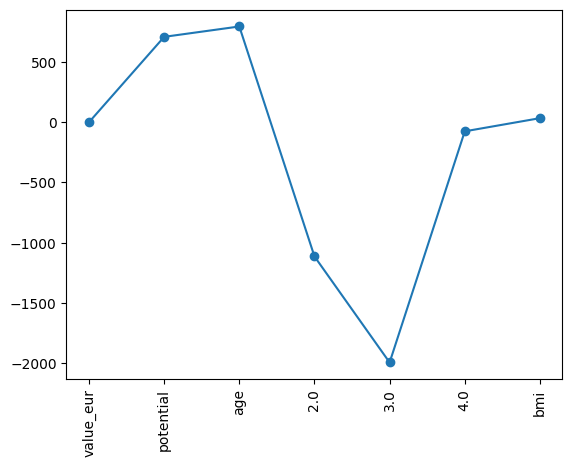

In [59]:
#X = model_data.drop('wage_eur', axis=1).values
y= model_data['wage_eur'].values.reshape(-1,1)
feature_col = model_data.drop('wage_eur', axis=1).columns.to_list()
lasso = Lasso(alpha=1)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
plt.plot(feature_col, lasso_coef, marker = 'o')
plt.xticks(rotation=90)
plt.show()

In [65]:
#create a linear_regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r_squared = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('R^2 : {}'.format(r_squared))
print('RMSE : {}'.format(rmse))

R^2 : 0.458641430527019
RMSE : 9438.006552872685
